In [ ]:
!pip install matplotlib
!pip install numpy

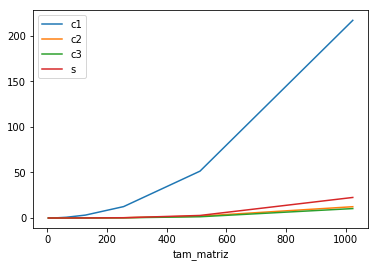

,abordagem,tam_matriz,tempo_nano
0,s,4,0.000056
1,s,8,0.000186
2,s,16,0.000711
3,s,32,0.005738
4,s,64,0.018459
5,s,128,0.065794
6,s,256,0.281932
7,s,512,2.806946
8,s,1024,22.563005
9,c1,4,0.003882


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from IPython.display import display

resultadoscsv = glob.glob("*.txt")
resultados = pd.DataFrame()

for result in resultadoscsv:
    m = pd.read_csv(result, sep=';',  header=None,   encoding='utf-8' )
    
    resultados = resultados.append(m, ignore_index=True)

resultados.columns = ["tam_matriz", "abordagem", "tempo_nano"]


size = [4,8,16,32,64,128,256,512, 1024]
abordagem = ['s','c1','c2','c3']
lista = []

for a in abordagem:
    aux = resultados.loc[resultados['abordagem'] == a]
    for s in size:
        tmp = aux.loc[resultados['tam_matriz'] == s]
        lista.append([a , s, str((tmp.tempo_nano.median() *pow(10,-9)))])
        
saida = pd.DataFrame(lista)
saida.columns = ["abordagem", "tam_matriz", "tempo_nano"]

# saida.to_csv('saida.csv', sep=';')

fig, ax = plt.subplots()
saida['tempo_nano']=saida['tempo_nano'].astype(float)


for key, grp in saida.groupby(["abordagem"]):
    ax = grp.plot(ax=ax, kind='line', x='tam_matriz', y='tempo_nano', label=key)

plt.legend(loc='best')
plt.show()




# c3 = resultados.loc[resultados['abordagem'] == 'c3']
display(saida)
#saida.plot.line(x='tam_matriz', y='tempo_nano')






# # maprovados =  c3['tempo_nano'].median() * pow(10,-9)

# # print(str(maprovados) + " segundos")
